In [87]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk 
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# data can be found at https://www.kaggle.com/datasets/bwandowando/1-5-million-uber-app-google-store-reviews
uber_reviews = pd.read_csv('UBER_REVIEWS.csv')
print(uber_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455477 entries, 0 to 1455476
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1455477 non-null  int64 
 1   review_id           1455477 non-null  object
 2   pseudo_author_id    1455477 non-null  object
 3   author_name         1455477 non-null  object
 4   review_text         1454882 non-null  object
 5   review_rating       1455477 non-null  int64 
 6   review_likes        1455477 non-null  int64 
 7   author_app_version  1084177 non-null  object
 8   review_timestamp    1455477 non-null  object
dtypes: int64(3), object(6)
memory usage: 99.9+ MB
None


In [44]:
# for sentiment analysis we will only be looking at review_text
df = uber_reviews['review_text']
print(df.head())

0    Better late than never. Welcome! Sign up was a...
1    Keeps telling me that my email and password is...
2    There's not a chance in h*ll I'd put my cc inf...
3    Sign up process is glitchy. Shoots you to the ...
4    Great service! Timely and comfortable rides. T...
Name: review_text, dtype: object


We can see there is some punctuation, capital letters, special cahracters which needs to be removed

In [49]:
def clean_text(text):
    """
    A function that will 
     - remove any NaN values
     - convert any float to string
     - replace all uppercase letters with lower case
     - remove any special characters and numbers
     - remove extra spaces
    """
    if pd.isna(text):
        return ''
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df_clean = df.apply(clean_text)
print(df_clean)

0          better late than never welcome sign up was a l...
1          keeps telling me that my email and password is...
2          theres not a chance in hll id put my cc info i...
3          sign up process is glitchy shoots you to the b...
4          great service timely and comfortable rides the...
                                 ...                        
1455472                                                 good
1455473      one time price low next time to book high price
1455474                         need more respectful service
1455475                                                great
1455476                                             pleasant
Name: review_text, Length: 1455477, dtype: object


Ok Good! It looks like most of the unwanted text has been removed

In [50]:
# check if any NaN values left
print(df_clean.isna().sum())

0


In [51]:
# check for empty rows
print((df_clean == '').sum())

21337


In [53]:
# lets drop all empty rows
df_clean = df_clean[df_clean != '']
print((df_clean == '').sum())

0


In [55]:
# lets Tokenize the text
def tokenize(text):
    return word_tokenize(text)
df_clean['token'] = df_clean.apply(word_tokenize)
print(df_clean)

0          better late than never welcome sign up was a l...
1          keeps telling me that my email and password is...
2          theres not a chance in hll id put my cc info i...
3          sign up process is glitchy shoots you to the b...
4          great service timely and comfortable rides the...
                                 ...                        
1455473      one time price low next time to book high price
1455474                         need more respectful service
1455475                                                great
1455476                                             pleasant
token      0          [better, late, than, never, welcome...
Name: review_text, Length: 1434141, dtype: object


In [59]:
# Training a Word2Vec model, to allow us to give values to every word
model = Word2Vec(df_clean['token'], vector_size=100, window=5, min_count=1, workers=4)
print(model)

Word2Vec<vocab=212619, vector_size=100, alpha=0.025>


In [98]:
# test it to see what a single word represents in the matrx
vector = model.wv['great']
vector

array([ 2.6010656 , -2.068419  , -0.58516383,  1.3066113 , -2.669748  ,
        0.10932022,  0.7347345 ,  0.9691234 , -1.6725671 , -1.8801787 ,
       -0.79617184,  2.2606432 , -0.80591965,  1.2354449 ,  0.83148444,
        2.6651785 ,  0.3100164 ,  4.687043  ,  0.8328555 ,  0.9663829 ,
       -1.6272423 ,  1.0229689 , -0.2149253 , -0.44339028, -1.2152054 ,
       -1.5025743 , -0.885672  , -0.72246873, -1.3044882 ,  0.757452  ,
       -0.99323046,  1.716307  ,  0.69634354, -1.845314  , -1.2550144 ,
       -0.10257609, -0.8271214 , -0.2905124 , -0.08000589, -1.5471436 ,
        0.16075885,  0.89274067, -0.17293285,  0.5102536 ,  1.8317282 ,
        0.34417844,  0.41629788,  1.7446914 ,  0.44043595, -0.01377637,
        0.7395744 ,  1.0828521 ,  0.2848332 , -4.776335  ,  4.363623  ,
        0.272614  ,  0.8716378 ,  2.1739628 ,  1.9164524 ,  1.125212  ,
        0.16174668, -0.7377266 ,  4.275166  , -1.5882204 , -1.6809187 ,
        3.6289196 , -0.44930956,  0.83946407, -0.40227076, -1.30

In [69]:
# lets see what words it finds similar to rude, showing the top 10
similar_words = model.wv.most_similar('rude', topn=10)
print(similar_words)

[('arrogant', 0.8751748204231262), ('unprofessional', 0.8456382751464844), ('impolite', 0.8126387000083923), ('disrespectful', 0.8022738099098206), ('aggressive', 0.7671120166778564), ('misbehaving', 0.7664089798927307), ('harsh', 0.7625654339790344), ('careless', 0.7605326175689697), ('irresponsible', 0.7376469969749451), ('mannerless', 0.7011056542396545)]


In [73]:
# lets lookf for some analogies, close to nice and fast, far away from slow
analogy_result = model.wv.most_similar(positive=['nice', 'fast'], negative=['slow'], topn=1)
print(analogy_result)

[('awesome', 0.7290855050086975)]


In [96]:
# lets visualise some of the words, starting with selecting some random words
words = ['uber', 'fast', 'slow', 'man', 'woman', 'city', 'expensive', 'trip', 'cheap', 
         'nice', 'taxi', 'drink', 'rude', 'chat', 'smile', 'warm', 'drunk', 'food',
         'scary', 'seat', 'door', 'floor', 'handle', 'window', 'cold', 'hair', 'red',
         'smell', 'light', 'dark', 'relax', 'angry', 'rain', 'stain', 'work', 'late', 'early'] 
word_vectors = [model.wv[word] for word in words if word in model.wv]

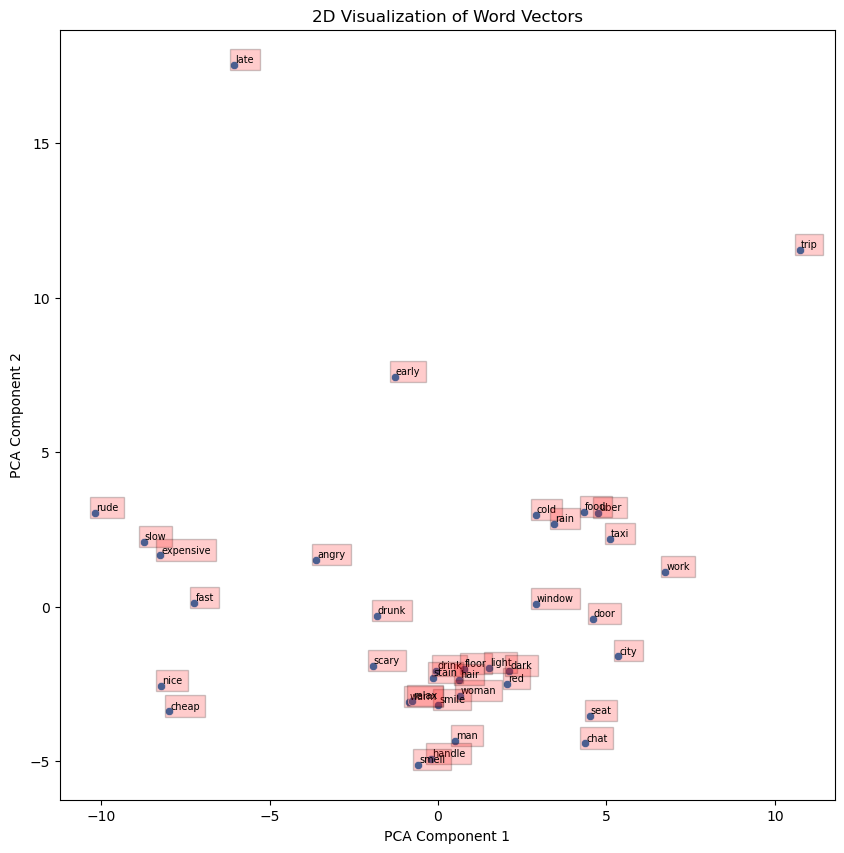

In [103]:
# using PCA to reduce dimensions to allow us to plot the words
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)
# using seaborn to plot the data with our selected words
plt.figure(figsize=(10, 10))
plot_data = pd.DataFrame(word_vecs_2d, columns=['PCA1', 'PCA2'])
plot_data['word'] = words
sns.scatterplot(data=plot_data, x='PCA1', y='PCA2')
word_vecs_pca = pca.fit_transform(word_vectors)
for i in range(plot_data.shape[0]):
    plt.text(x=plot_data.PCA1[i]+0.03, y=plot_data.PCA2[i]+0.03, s=plot_data.word[i], 
             fontdict=dict(color='black', size=7),
             bbox=dict(facecolor='red', alpha=0.2))

plt.title('2D Visualization of Word Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()